## Data Overview & Exploration for the Deals Dataset - DS 5640 Midterm Project
## Completed by: Najma Thomas-Akpanoko

In [2]:
# import exploratory data analysis (EDA) essential libraries

import pandas as pd # for data manipulation and calculations
import numpy as np # for data manipulation and calculations
import seaborn as sns  # for data visualization                   
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns


# read in the dataset
df = pd.read_csv('anonymized_hubspot_deals.csv')
# print the first 5 rows of the dataframe
print(df.head())



# # convert to a pandas data frame
# X_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
# Y_df = pd.DataFrame({"target": diabetes.target})
# #combine diabetes data columns with target column 
# df = pd.concat([X_df, Y_df], axis=1) 


   Weighted amount                       Deal Description  \
0            250.0                        40-50 employees   
1              0.0                        3,000 + Agents.   
2              0.0                            5-6k agents   
3              0.0            Furthest Along - 300 agents   
4          10000.0  BPO through partnership with AmplifAI   

  Cumulative time in "BANT Deal. Pain ID'ed (Sales Pipeline)" (HH:mm:ss)  \
0                                                NaN                       
1                                                NaN                       
2                                                NaN                       
3                                                NaN                       
4                                                NaN                       

  Cumulative time in "Opportunity (Sales Pipeline)" (HH:mm:ss)  Days to close  \
0                                                NaN                       69   
1             

In [3]:
# understand the dataset

# print the shape of the dataframe
print(df.shape)

# determine the data types of the columns and the number of non-null values
print(df.info())

# identify and quantify missing values in the dataset
df.isnull().sum()

#check for duplicate rows in the dataset
df.duplicated().sum()

# drop duplicate rows
df = df.drop_duplicates()
print(df.shape)

(593, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 50 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Weighted amount                                                                573 non-null    float64
 1   Deal Description                                                               491 non-null    object 
 2   Cumulative time in "BANT Deal. Pain ID'ed (Sales Pipeline)" (HH:mm:ss)         209 non-null    object 
 3   Cumulative time in "Opportunity (Sales Pipeline)" (HH:mm:ss)                   37 non-null     object 
 4   Days to close                                                                  593 non-null    int64  
 5   Deal Score                                                                     167 non-null    float64
 6   Close Date      

In [4]:
# clean the dataset

# delete columns that are not needed because they have over 80% missing values
drop_threshold = 0.8 * len(df)
df = df.dropna(axis=1, thresh=drop_threshold)
print(df.shape)
print(df.info())

(593, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weighted amount                      573 non-null    float64
 1   Deal Description                     491 non-null    object 
 2   Days to close                        593 non-null    int64  
 3   Close Date                           543 non-null    object 
 4   Deal source attribution 2            587 non-null    object 
 5   Pipeline                             593 non-null    object 
 6   Record ID                            593 non-null    int64  
 7   Forecast category                    593 non-null    object 
 8   Original Traffic Source              577 non-null    object 
 9   Associated Company                   572 non-null    object 
 10  Deal owner                           558 non-null    object 
 11  Is Closed (numeric)   

In [12]:
# convert datatypes of columns

# Convert date columns to datetime
df["Close Date"] = pd.to_datetime(df["Close Date"], errors='coerce')
df["Create Date"] = pd.to_datetime(df["Create Date"], errors='coerce')
df["Last Modified Date"] = pd.to_datetime(df["Last Modified Date"], errors='coerce')

# Convert categorical columns to category type
categorical_cols = ["Pipeline", "Deal Stage", "Deal source attribution 2", "Forecast category", "Original Traffic Source", "Deal owner", "Deal Type"]
df[categorical_cols] = df[categorical_cols].astype("category")

print(df.dtypes)


# Fill missing values in key numerical columns with median
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# check if numerical columns still have missing values
df.isnull().sum()

# Fill missing values in key categorical columns with mode
categorical_columns = df.select_dtypes(include=['category']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


Weighted amount                               float64
Deal Description                               object
Days to close                                   int64
Close Date                             datetime64[ns]
Deal source attribution 2                    category
Pipeline                                     category
Record ID                                       int64
Forecast category                            category
Original Traffic Source                      category
Associated Company                             object
Deal owner                                   category
Is Closed (numeric)                             int64
Amount in company currency                    float64
Deal probability                              float64
Associated Company (Primary)                   object
Is Closed Won                                   int64
Is closed lost                                   bool
Weighted amount in company currency           float64
Is Deal Closed?             

In [13]:
# EDA Analysis Step 1: Summary Statistics

# Get descriptive statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)


# Display the summary statistics in a readable format
from IPython.display import display
display(summary_stats)

       Weighted amount  Days to close                     Close Date  \
count       593.000000     593.000000                            543   
mean      15268.472175     153.819562  2024-02-17 17:48:35.359116032   
min           0.000000       0.000000            2020-12-20 10:26:00   
25%           0.000000      89.000000            2022-12-20 11:54:00   
50%           0.000000     128.000000            2024-03-03 20:20:00   
75%       10000.000000     167.000000            2025-01-29 16:44:30   
max      769500.000000    1045.000000            2027-08-01 09:01:00   
std       55271.536142     134.044086                            NaN   

          Record ID  Is Closed (numeric)  Amount in company currency  \
count  5.930000e+02           593.000000                  593.000000   
mean   1.691690e+10             0.715008                39473.200675   
min    9.756567e+09             0.000000                    0.000000   
25%    9.817334e+09             0.000000                 5000.0

,Weighted amount,Days to close,Close Date,Record ID,Is Closed (numeric),Amount in company currency,Deal probability,Is Closed Won,Weighted amount in company currency,Amount,Forecast amount,Is Open (numeric),Create Date,Last Modified Date
count,593.000000,593.000000,543,5.930000e+02,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593,593
mean,15268.472175,153.819562,2024-02-17 17:48:35.359116032,1.691690e+10,0.715008,39473.200675,0.341062,0.266442,15268.472175,39473.200675,39473.200675,0.284992,2023-09-22 07:21:34.806071040,2024-12-06 20:54:58.077571584
min,0.000000,0.000000,2020-12-20 10:26:00,9.756567e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-08-08 11:35:00,2024-01-12 17:56:00
25%,0.000000,89.000000,2022-12-20 11:54:00,9.817334e+09,0.000000,5000.000000,0.000000,0.000000,0.000000,5000.000000,5000.000000,0.000000,2022-08-14 07:46:00,2024-11-14 10:32:00
50%,0.000000,128.000000,2024-03-03 20:20:00,1.581545e+10,1.000000,24000.000000,0.050000,0.000000,0.000000,24000.000000,24000.000000,0.000000,2023-10-27 12:47:00,2025-01-22 16:43:00
75%,10000.000000,167.000000,2025-01-29 16:44:30,1.997476e+10,1.000000,50000.000000,1.000000,1.000000,10000.000000,50000.000000,50000.000000,1.000000,2024-05-15 15:49:00,2025-02-13 13:21:00
max,769500.000000,1045.000000,2027-08-01 09:01:00,3.377447e+10,1.000000,1000000.000000,1.000000,1.000000,769500.000000,1000000.000000,1000000.000000,1.000000,2025-02-20 15:27:00,2025-02-20 16:41:00
std,55271.536142,134.044086,NaN,6.945948e+09,0.451792,76176.626231,0.434993,0.442471,55271.536142,76176.626231,76176.626231,0.451792,NaN,NaN


In [14]:
# EDA Analysis Step 2: Check Class Distributions
check_categorical_cols = df.select_dtypes(include='object').columns
for col in check_categorical_cols:
    print(df[col].value_counts())

Deal Description
.                                                         32
Renewal                                                   29
BPO                                                        8
BPO Program                                                5
Training and Coaching                                      3
                                                          ..
50-70 agents                                               1
Zenarate Head to head                                      1
33,000 employees - training                                1
Additional growth of $8,750 in the renewal                 1
HALTED SALES ACTIVITY - Typhoon\nFocus on assisting...     1
Name: count, Length: 400, dtype: int64
Associated Company
Associated_ef811650    23
Associated_4019582e    15
Associated_7059f1f6    11
Associated_141fa164     9
Associated_f62b3a08     9
                       ..
Associated_bedeba1d     1
Associated_951452f2     1
Associated_238a17a9     1
Associated_754ae28b 

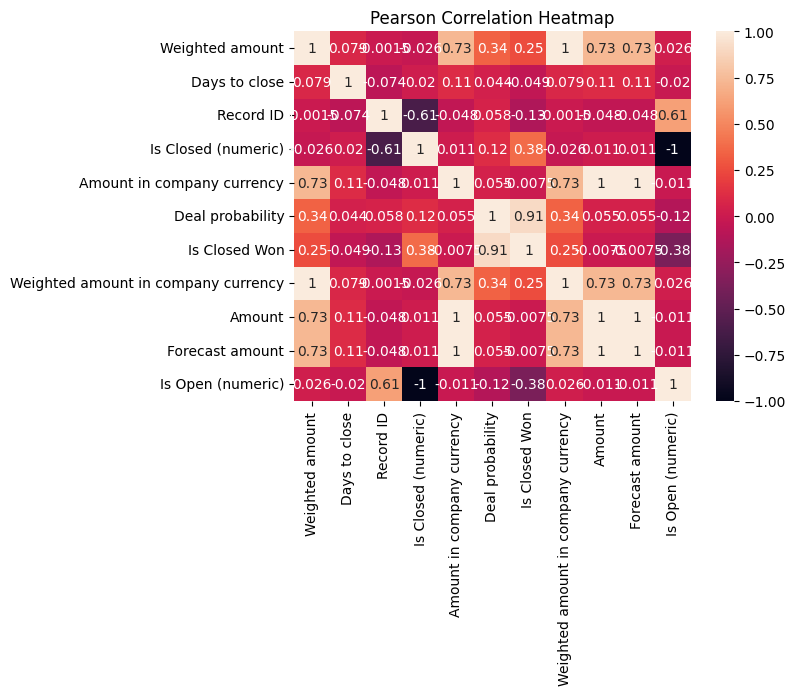

In [15]:
## EDA Analysis Step 3: Buld a Correlation Matrix
#  Ensure 'Is Closed Won' is numeric (convert boolean to int)
# correlation matrix
correlation_matrix = numerical_df.corr(method = 'pearson')
correlation_matrix['Is Closed Won'] # output just the correlation array between each variable and the target column

# Heat Map to Visualize the Correlation Matrix
sns.heatmap(correlation_matrix, annot = True)
plt.title("Pearson Correlation Heatmap")
plt.show()

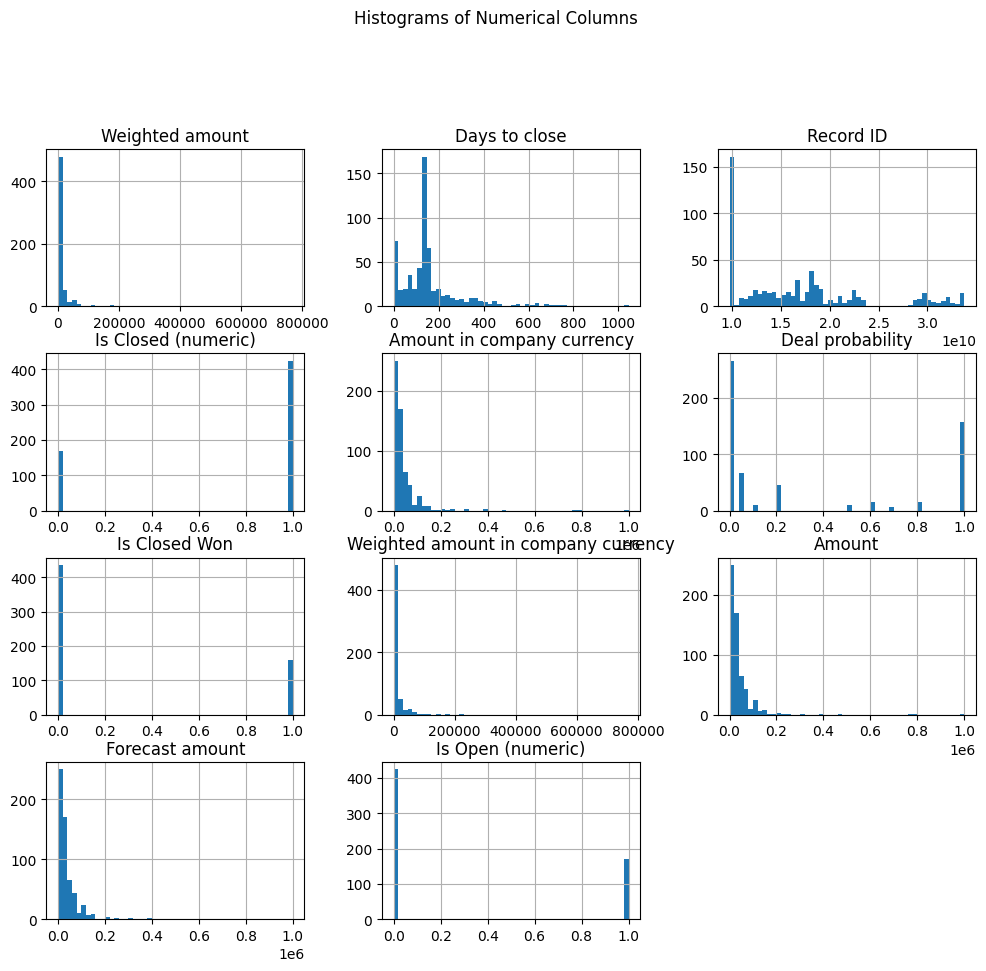

In [16]:
# EDA Analysis Step 4: Visualize the Data - Histograms
# Histograms for numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_df.hist(figsize=(12, 10), bins=50)
plt.suptitle("Histograms of Numerical Columns", x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()


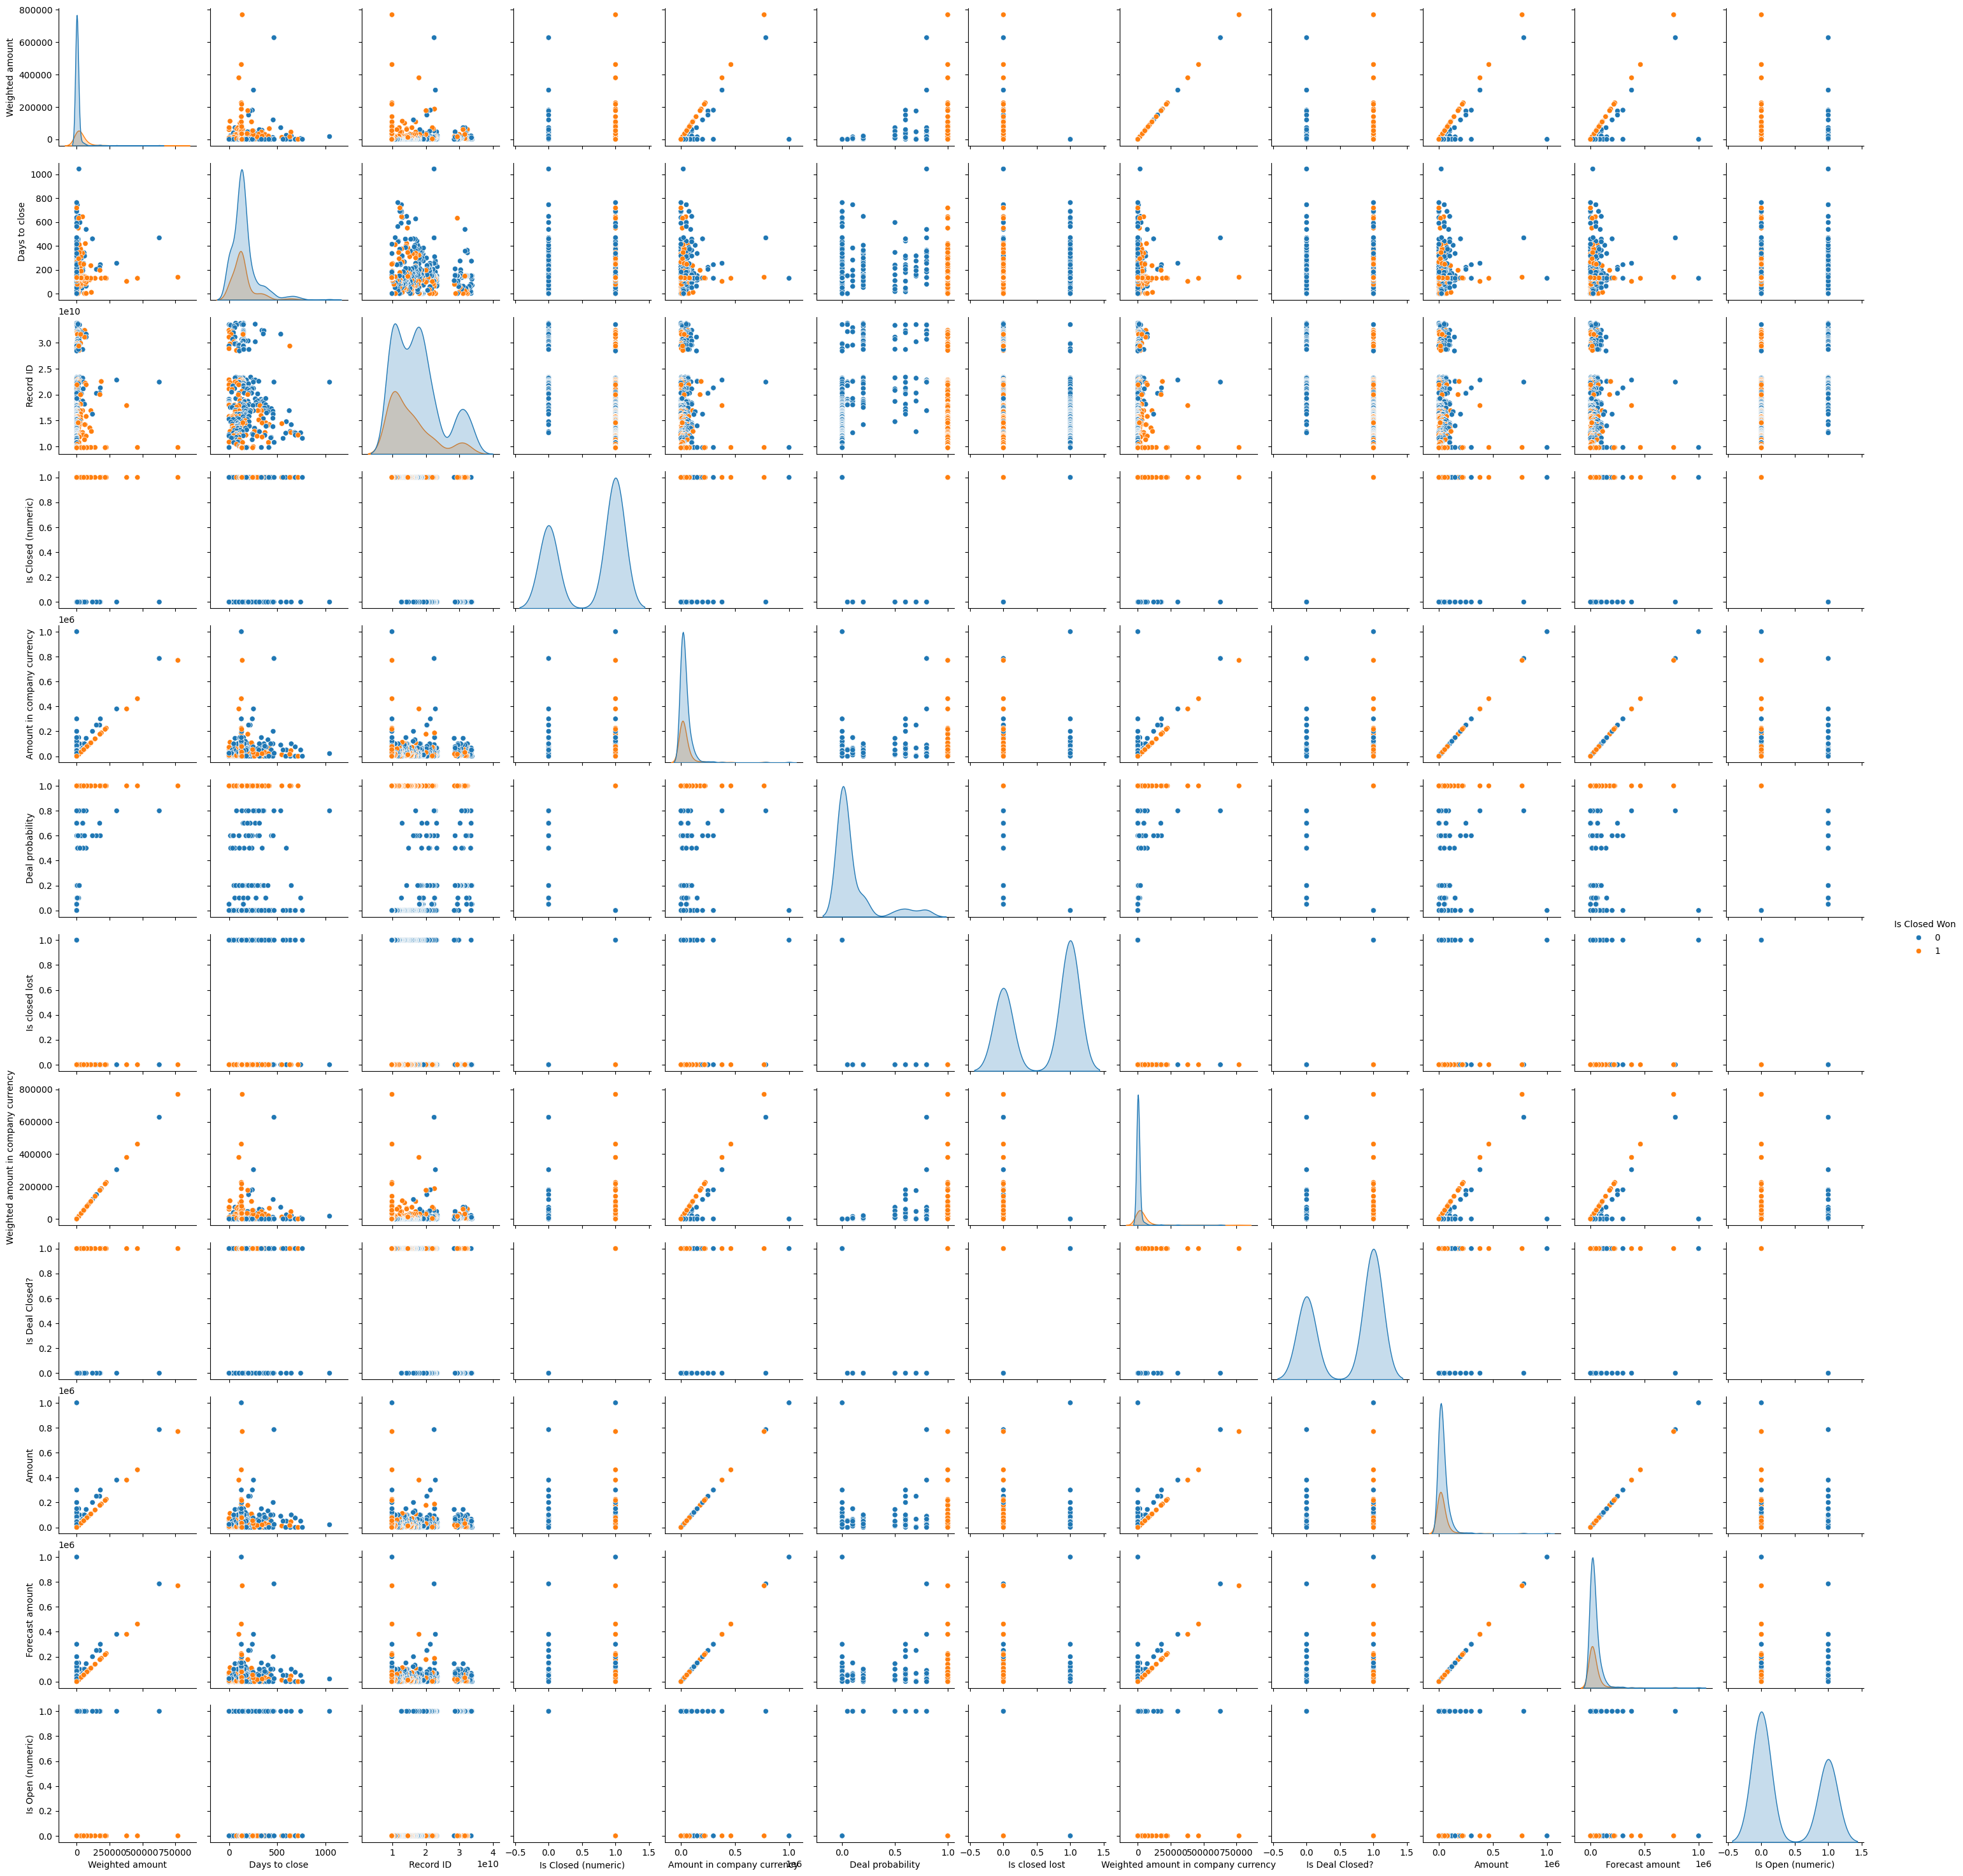

In [ ]:
# EDA Analysis Step 4: Visualize the Data - Scatter Plots
# Scatter plots for numerical columns
sns.pairplot(df, hue='Is Closed Won')
plt.show()


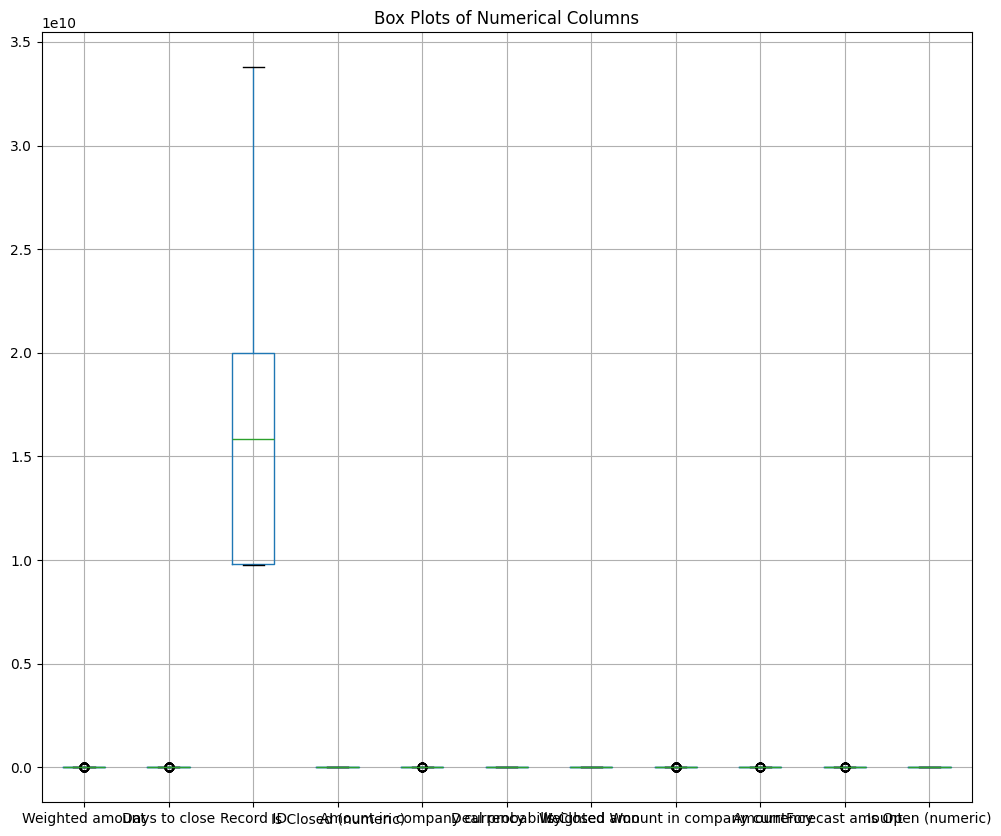

In [18]:
# EDA Analysis Step 4: Visualize the Data - Box Plots
# Box plots for numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_df.boxplot(figsize=(12, 10))
plt.title("Box Plots of Numerical Columns")
plt.show()


In [ ]:
# summary statistics for categorical columns
summary_categorical = df.select_dtypes(include=['object', 'category']).describe()
print(summary_categorical)


# Display the summary statistics in a readable format
from IPython.display import display
display(summary_categorical)

       Deal Description Deal source attribution 2        Pipeline  \
count               491                       593             593   
unique              400                        13               1   
top                   .          SymTrain EE name  Sales Pipeline   
freq                 32                       198             593   

       Forecast category Original Traffic Source   Associated Company  \
count                593                     593                  572   
unique                 5                       6                  344   
top       Not forecasted         Offline Sources  Associated_ef811650   
freq                 347                     495                   23   

           Deal owner Associated Company (Primary)      Deal Name  \
count             593                          572            593   
unique             24                          338            588   
top     Deal_3d3dc242          Associated_ef811650  Deal_eed97016   
freq        

,Deal Description,Deal source attribution 2,Pipeline,Forecast category,Original Traffic Source,Associated Company,Deal owner,Associated Company (Primary),Deal Name,Create Date,Last Modified Date,Deal Stage,Deal Type
count,491,593,593,593,593,572,593,572,593,593,593,593,593
unique,400,13,1,5,6,344,24,338,588,443,327,11,4
top,.,SymTrain EE name,Sales Pipeline,Not forecasted,Offline Sources,Associated_ef811650,Deal_3d3dc242,Associated_ef811650,Deal_eed97016,8/14/2022 7:46,1/12/2024 17:56,Closed Lost,New
freq,32,198,593,347,495,23,225,25,2,147,37,266,438
